<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/0902_kmeans_cont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = np.random.randint(1, 100, size=(1000, 2))
print(data[:10])

[[ 9 32]
 [67  4]
 [30 91]
 [13 83]
 [45 55]
 [53 81]
 [13 22]
 [37 99]
 [67  8]
 [87 97]]


<Axes: xlabel='x', ylabel='y'>

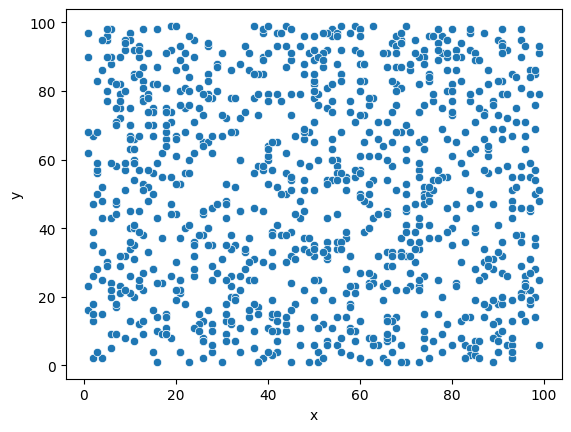

In [6]:
df = pd.DataFrame(data, columns=["x", "y"])
sns.scatterplot(x="x", y="y", data=df)

In [7]:
def euclidean(p0, p1):
    return (np.sum((p0 - p1)**2))**0.5

In [10]:
a = np.array([0, 3])
b = np.array([4, 0])
euclidean(a, b)

5.0

In [67]:
def kmeans(data, k=3, dist=euclidean, random_state=1981, maxrange=100):
    m, n = data.shape
    minlim = np.min(data, axis=0)
    maxlim = np.max(data, axis=0)
    lim = 0.001
    np.random.seed(random_state)
    centroids = np.random.random(size=(k, n)) * maxrange
    delta = np.full((k), float("inf"))
    labels = np.full((m), -1, dtype=int)
    while (delta > lim).any():
        for i in range(m):
            lbl = -1
            d = float("inf")
            for j in range(k):
                d2 = dist(data[i], centroids[j])
                if d2 < d:
                    lbl = j
                    d = d2
            labels[i] = lbl
            
        lk = np.zeros((k))
        centroids2 = np.zeros_like(centroids)
        for i in range(m):
            lbl = labels[i]
            lk[lbl] += 1
            for j in range(n):
                centroids2[lbl, j] += data[i, j]
        for i in range(k):
            centroids2[i] = centroids2[i] / lk[i]
        delta = centroids - centroids2
        centroids = centroids2
        #print(centroids2)
        #print(lk)
    return labels


<Axes: xlabel='x', ylabel='y'>

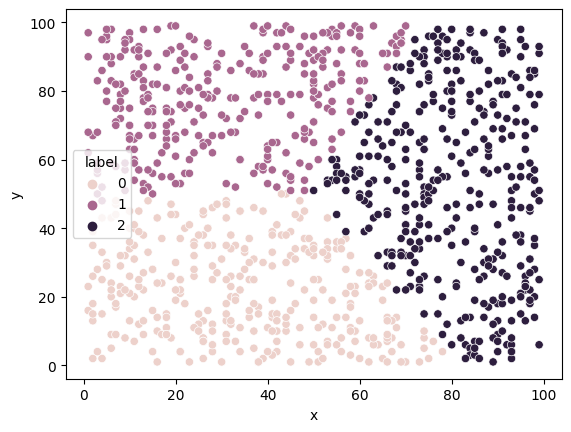

In [57]:
df["label"] = kmeans(data)
sns.scatterplot(x="x", y="y", hue="label", data=df)

In [58]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [63]:
print(x_train[4, 4:24, 5:20])
print(y_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  55 148 210 253 253 113  87 148]
 [  0   0   0   0   0   0  87 232 252 253 189 210 252 252 253]
 [  0   0   0   0   4  57 242 252 190  65   5  12 182 252 253]
 [  0   0   0   0  96 252 252 183  14   0   0  92 252 252 225]
 [  0   0   0 132 253 252 146  14   0   0   0 215 252 252  79]
 [  0   0 126 253 247 176   9   0   0   8  78 245 253 129   0]
 [  0  16 232 252 176   0   0   0  36 201 252 252 169  11   0]
 [  0  22 252 252  30  22 119 197 241 253 252 251  77   0   0]
 [  0  16 231 252 253 252 252 252 226 227 252 231   0   0   0]
 [  0   0  55 235 253 217 138  42  24 192 252 143   0   0   0]
 [  0   0   0   0   0   0   0   0  62 255 253 109   0   0   0]
 [  0   0   0   0   0   0   0   0  71 253 252  21   0   0   0]
 [  0   0   0   0   0   0   0   0   0 253 252  21   0  

In [64]:
m, rows, cols = x_train.shape
x_train = x_train.reshape((m, rows*cols))

In [65]:
x_train.shape

(60000, 784)

In [68]:
# labels = kmeans(x_train, k=10, dist=lambda a, b: np.sum(abs(a - b)), maxrange=255)

KeyboardInterrupt: ignored

In [69]:
from sklearn.cluster import KMeans

In [71]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
labels = kmeans.labels_
(uniq, freq) = (np.unique(labels, return_counts=True))
print(uniq, freq)

[0 1 2 3 4 5 6 7 8 9] [5642 4669 5959 6518 3096 8842 7434 3202 8919 5719]


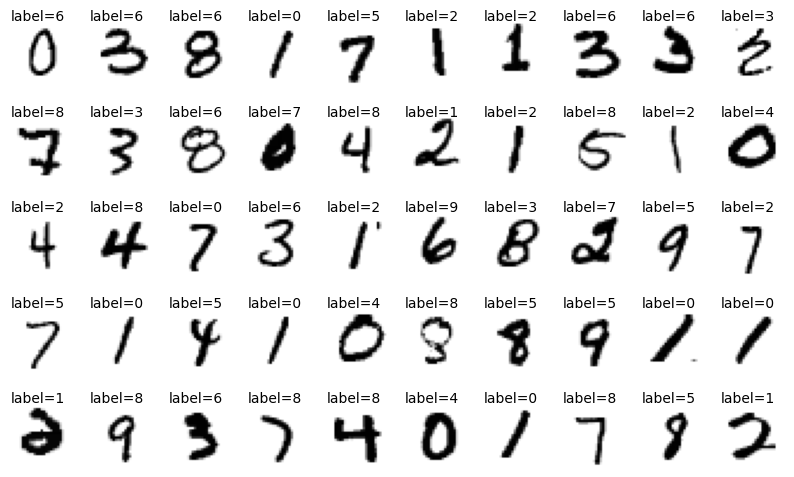

In [74]:
import random

x_train1 = x_train.reshape((m, rows, cols))
fig, axs = plt.subplots(5, 10, figsize=(10, 6))
for i in range(5):
    for j in range(10):
        idx = random.randint(0, 60000)
        axs[i, j].imshow(x_train1[idx], cmap="gray_r")
        axs[i, j].axis("off")
        axs[i, j].text(0, 0, f"label={labels[idx]}")
plt.show()